        Date  Unemployment_Rate  Interest_Rate  Money_Supply       PPI  \
0  1/31/1960           0.157895       0.206824      0.278081  0.398563   
1  2/29/1960           0.122807       0.205774      0.267591  0.398563   
2  3/31/1960           0.175439       0.198950      0.260345  0.414536   
3  4/30/1960           0.157895       0.203150      0.258897  0.406549   
4  5/31/1960           0.149123       0.199475      0.243890  0.398588   

        CPI  GDP_Growth  Consumer_Confidence  Interest_Rate_Lagged  \
0  0.193324    0.590837             0.773118              0.127559   
1  0.203767    0.530806             0.806452              0.124934   
2  0.210112    0.470774             0.770430              0.144357   
3  0.235099    0.410742             0.734409              0.152756   
4  0.228616    0.432333             0.698387              0.149606   

   Money_Supply_Lagged  PPI_Lagged  CPI_Lagged  
0             0.278081    0.422624    0.196402  
1             0.278081    0.422624  

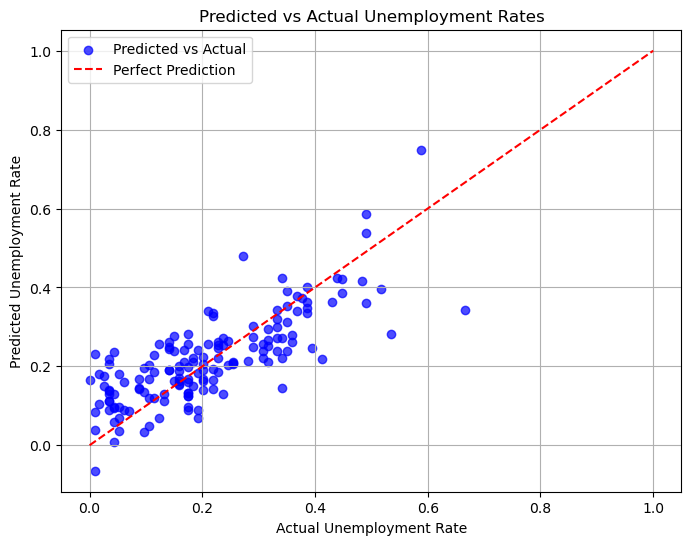

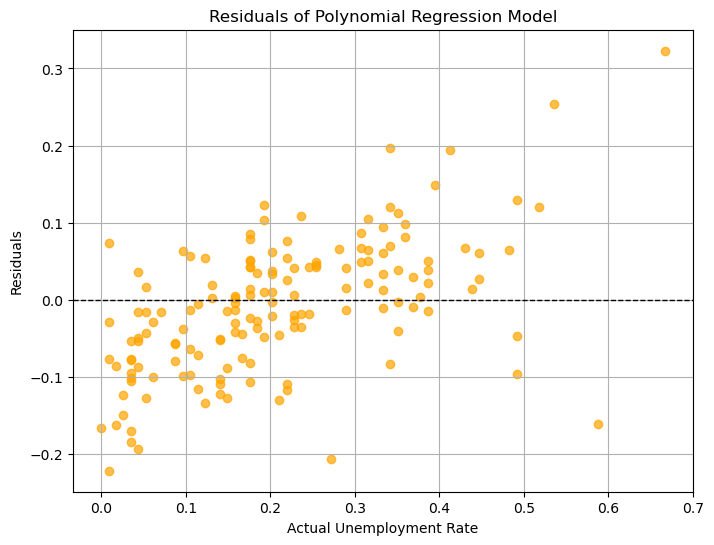

                                     Feature  Coefficient
15            Money_Supply_Lagged CPI_Lagged     0.062990
5                        Consumer_Confidence    -0.057324
14            Money_Supply_Lagged PPI_Lagged    -0.044501
11  Interest_Rate_Lagged Consumer_Confidence     0.044023
12           Interest_Rate_Lagged GDP_Growth     0.033236


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import os

# Load the dataset
file_path = 'C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/lagged_dataset/lagged_dataset_merged.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Extract lagged predictors and additional features as specified
X_lagged = data[['Interest_Rate_Lagged', 'Money_Supply_Lagged', 'PPI_Lagged', 
                 'CPI_Lagged', 'Consumer_Confidence', 'GDP_Growth']]
y = data['Unemployment_Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lagged, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()  # Initialize the StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)  # Initialize PolynomialFeatures with degree 2
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit a Linear Regression model
model = LinearRegression()  # Initialize the LinearRegression model
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
mse_lagged = mean_squared_error(y_test, y_test_pred)
rmse_lagged = np.sqrt(mse_lagged)
mae_lagged = mean_absolute_error(y_test, y_test_pred)
r2_lagged = r2_score(y_test, y_test_pred)

lagged_evaluation_results = {
    "MSE": mse_lagged,
    "RMSE": rmse_lagged,
    "MAE": mae_lagged,
    "R-squared": r2_lagged
}

print(lagged_evaluation_results)

import matplotlib.pyplot as plt

# Residuals for the test set
residuals = y_test - y_test_pred

# Plot: Predicted vs Actual Unemployment Rates
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Unemployment Rates')
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.legend()
plt.grid(True)
output_file = '../output/polynomial_regression'
save_path = os.path.join(output_file, 'predicted_v_actual.png')
plt.savefig(save_path, format="png", dpi=300, bbox_inches="tight")
plt.show()

# Plot: Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='orange', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals of Polynomial Regression Model')
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Residuals')
plt.grid(True)
output_file = '../output/polynomial_regression'
save_path = os.path.join(output_file, 'residuals.png')
plt.savefig(save_path, format="png", dpi=300, bbox_inches="tight")
plt.show()

# Retrieve feature names after polynomial transformation
feature_names = poly.get_feature_names_out(['Interest_Rate_Lagged', 'Money_Supply_Lagged',
                                            'PPI_Lagged', 'CPI_Lagged', 
                                            'Consumer_Confidence', 'GDP_Growth'])

# Retrieve coefficients from the trained model
coefficients = model.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display the top 10 most impactful predictors
top_features = feature_importance.head(10)

# Save the top features to a CSV file for review
top_features.to_csv('top_10_features.csv', index=False)
output_file = '../output/polynomial_regression'
save_path = os.path.join(output_file, 'top_features.csv')
top_features.to_csv(save_path, index = False)
print(top_features.head())

